# Clustering


## 클러스터링의 정의

유사한 속성을 갖는 데이터들을 묶어 전체 데이터를 몇 개의 군집으로 나누는 것

* Classification; 분류; 유형
    * Supervised Learning: 지도 학습
    * 소속 집단의 정보를 알고 있는 상태
    * label이 있는 데이터를 나누는 방법

* clustering
    * Unsupervised Learning: 비지도 학습
    * 소속 집단의 정보를 모르고 있는 상태
    * label이 없는 데이터를 나누는 방법


##  Hierarchical clustering: 계층적 군집화
* 개체들을 가까운 집단부터 묶어 나가는 방식
* 유사한 개체들이 결합되는 덴드로그램 생성
* cluster들은 sub-cluster를 갖고 있다 
* 거리의 종류
    * 유클리드 거리
    * 맨해튼 거리
    * 표준화 거리
    * 만콥스키 거리
* Hierarchical clustering
    * 최단연결법: 군집에서 가장 가까운 데잍터가 새로운 거리가 된다.
    * 최장연결법: 군집에서 가장 먼 데이터가 군집과 데이터의 거리가 된다.
    * 평균연결법: 군집들의 데이터들 간의 거리의 평균이 군집과 데이터의 거리가 된다.
    * 중심연결법: 군집의 중심이 새로운 거리가 된다.

* 평가방법
    * 좋은 클러스터링 이란?
        * 군집 내 유사도를 최대화: 거리를 최소화
        * 군집 간 유사도를 최소화: 거리를 최대화
    
    * 내부평가: 군집된 결과 그 자체를 놓고 평가하는 방식
        * Dunn Index: 군집과 군집 사이의 거리가 클수록, 
군집 내 데이터간 거리가 작을수록 좋은 모델 -> DI가 큰 모델
        * 실루엣(Silhouette Index): 

    * 외부평가: 군집화에 사용되지 않은 데이터로 평가하는 방식

## non-Hierarchical clustering:비게층적 군집화

* 전체 데이터를 확인하고 특정한 기준으로 데이터를 동시에 구분
* 각 데이터들은 사전에 정의된 개수의 군집 중 하나에 속하게 됨

* K-means
    * 주어진 데이터를 K개의 군집으로 묶는 방법
    * 각 군집은 하나의 중심을 가짐
    * 각 데이터는 가장 가까운 중심에 할당
    * 같은 중심에 할당된 개체들이 모여 하나의 군집을 형성
    * 사전에 군집의 수, K가 정해져야 함
    
    * 장점: 적용하기 쉬움; 새로운 데이터에 대한 군집을 계산할 때 각 군집의 중심점과의 거리만 계산하면 되기 때문에 빠르다
    * 단점: 서로 다른 크기의 군집을 잘 못 찾음; 서로 다른 밀도의 군집을 잘 못찾음; 지역적 패턴이 존재하는 군집을 잘 못 찾음


* DB Scan
    * Density-Based Spatial Clustering of Applications with Noise
    * 점 P에서 부터 거리가 e(epsilon) 내에 m(minPts)개 이상 있으면 하나의 군집으로 인식

    * 장점: 지역적 패턴이 있는 데이터의 군집을 잘 찾을 수 있음; 노이즈 데이터를 따로 분류하여 노이즈 데이터들이 군집에 영향을 주지 않음
    * 단점: 밀도가 구역에 따라 바뀔 경우를 잘 파악하지 못 함

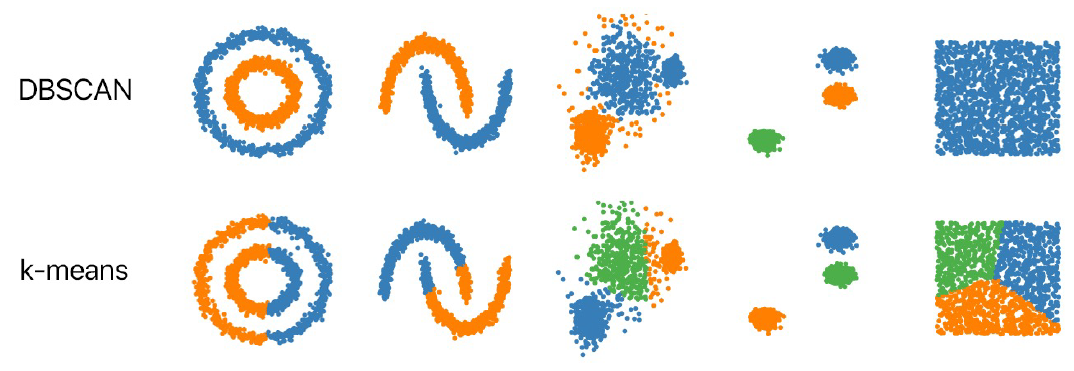

# Hierarchical Clustering (test)

In [ ]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [ ]:
# data
data = np.array(
    [
        (1, 5),
        (2, 4),
        (4, 6),
        (4, 3),
        (5, 3),
    ]
)

In [ ]:
# Hierarchical Clustering
## 최단 연결법

from sklearn.cluster import AgglomerativeClustering


single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="single"
)

single_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [ ]:
### dendrogram
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])# 가지고 있는 데이터 모두 묶는 방식

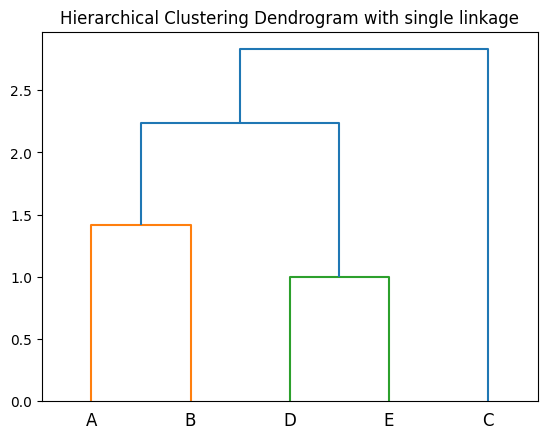

In [ ]:
plt.title('Hierarchical Clustering Dendrogram with single linkage')
plot_dendrogram(single_cluster, truncate_mode='level', p=3)
plt.show()

In [ ]:
# n개의 클러스터
## 2개의 클러스터
single_cluster_2 = AgglomerativeClustering(
    n_clusters=2, linkage="single"
)

single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [ ]:
single_cluster_2.labels_

array([0, 0, 1, 0, 0])

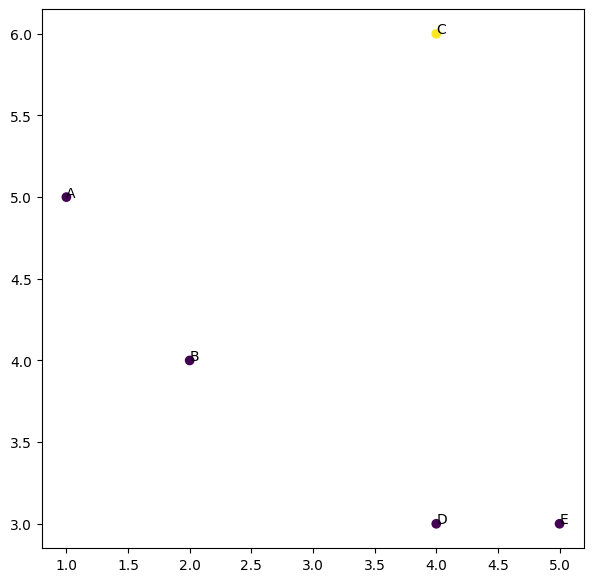

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

In [ ]:
## 3개의 클러스터
single_cluster_3 = AgglomerativeClustering(
    n_clusters=3, linkage="single"
)

single_cluster_3.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [ ]:
single_cluster_3.labels_

array([0, 0, 1, 2, 2])

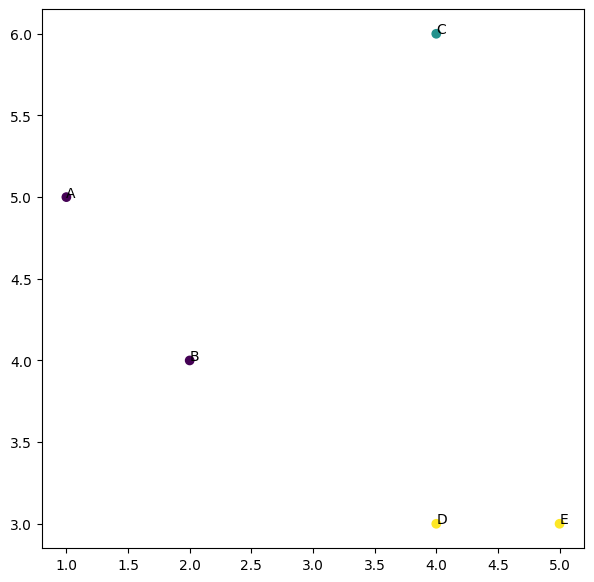

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

In [ ]:
#평균 연결법
avg_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="average"
)

avg_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

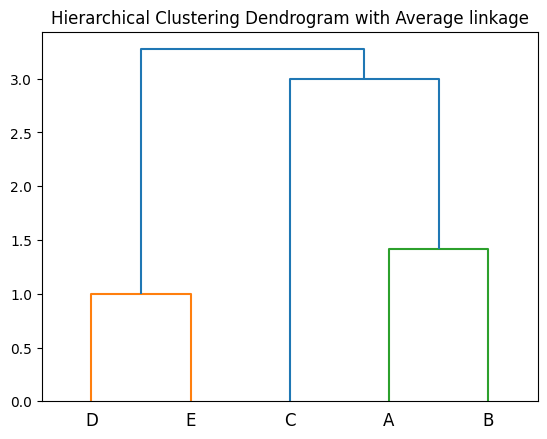

In [ ]:
plt.title('Hierarchical Clustering Dendrogram with Average linkage')
plot_dendrogram(avg_cluster, truncate_mode='level', p=3)
plt.show()

In [ ]:
# 최장 연결법
max_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="complete"
)

max_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

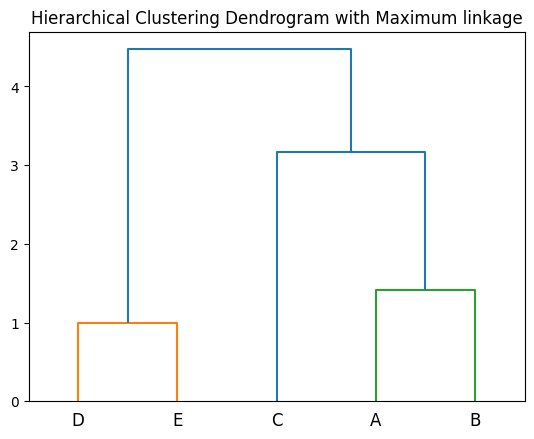

In [ ]:
plt.title('Hierarchical Clustering Dendrogram with Maximum linkage')
plot_dendrogram(max_cluster, truncate_mode='level', p=3)
plt.show()

In [ ]:
# 중심연결법
centroid_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="ward"
)

centroid_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

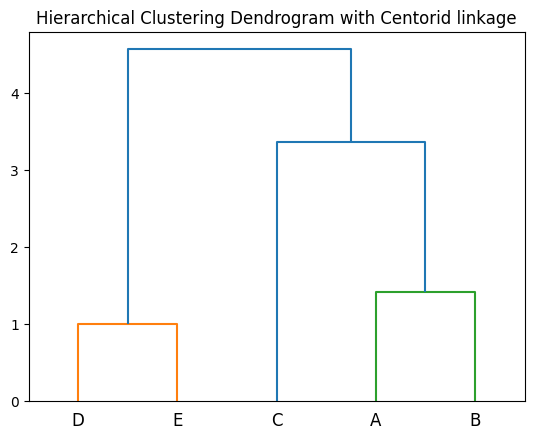

In [ ]:
plt.title('Hierarchical Clustering Dendrogram with Centorid linkage')
plot_dendrogram(centroid_cluster, truncate_mode='level', p=3)
plt.show()

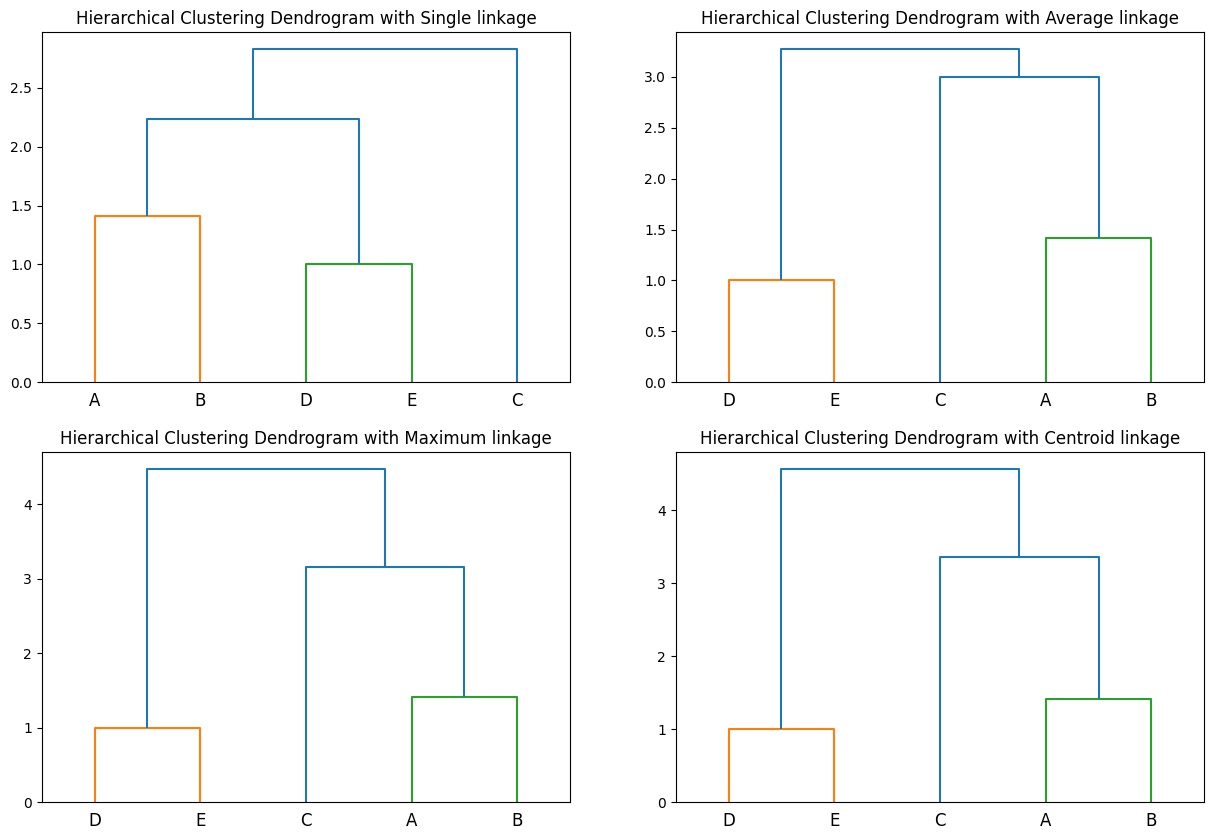

In [ ]:
# 전체적으로 비교해 보기
clusters = [
    ("Single", single_cluster),
    ("Average", avg_cluster),
    ("Maximum", max_cluster),
    ("Centroid", centroid_cluster),
]

# 덴드로그램 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, (name, cluster) in enumerate(clusters):
    ax = axes[idx//2, idx%2]
    ax.set_title(f'Hierarchical Clustering Dendrogram with {name} linkage')
    plot_dendrogram(cluster, truncate_mode='level', p=3, ax=ax)

# Non-Hierarchical Clustering (Test)

In [ ]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

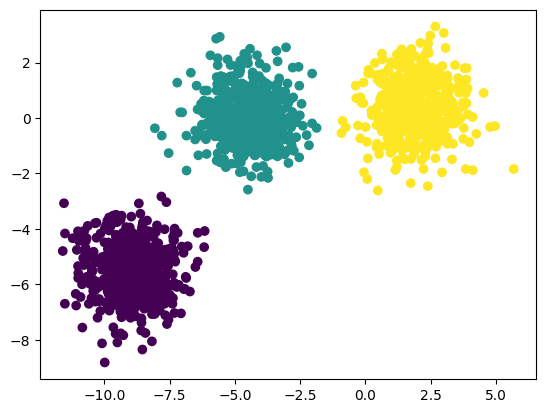

In [ ]:
# data
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1500, random_state=170)

plt.scatter(data[:, 0], data[:, 1], c=label)

## K Means

In [ ]:
# 정확한 군집의 갯수를 맞춘 경우
from sklearn.cluster import KMeans

correct_kmeans = KMeans(n_clusters=3)

correct_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
correct_pred = correct_kmeans.predict(data)
correct_kmeans.cluster_centers_

array([[ 1.91176144,  0.40634045],
       [-8.94137566, -5.48137132],
       [-4.55490993,  0.02920864]])

In [ ]:
correct_center = correct_kmeans.cluster_centers_

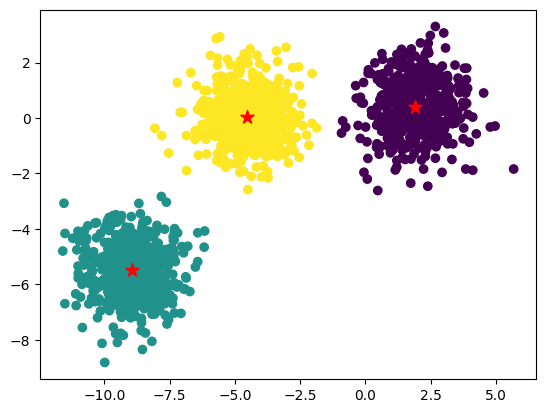

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=correct_pred)
plt.scatter(correct_center[:, 0], correct_center[:, 1], marker="*", s=100, color="red")


In [ ]:
# 군집의 갯수가 틀린 경우
## 적은 경우
small_kmeans = KMeans(n_clusters=2)
small_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
small_pred = small_kmeans.predict(data)

In [ ]:
small_center = small_kmeans.cluster_centers_

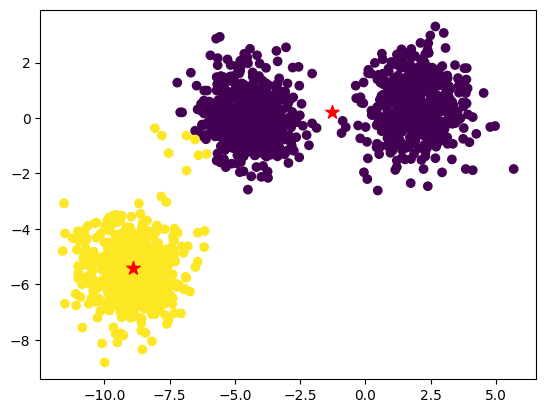

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=small_pred)
plt.scatter(small_center[:, 0], small_center[:, 1], marker="*", s=100, color="red")

In [ ]:
## 큰 경우
large_kmeans = KMeans(n_clusters=4)

large_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

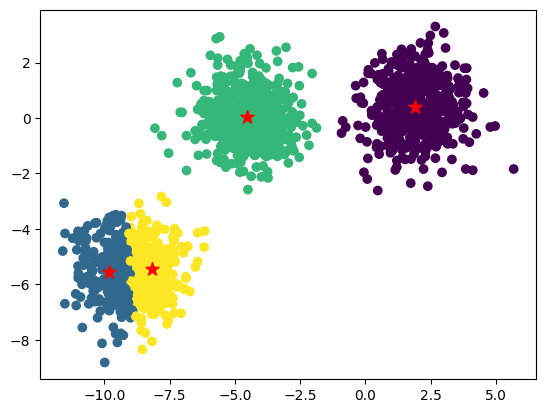

In [ ]:
large_pred = large_kmeans.predict(data)
large_center = large_kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=large_pred)
plt.scatter(large_center[:, 0], large_center[:, 1], marker="*", s=100, color="red")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Sum of Sqaured Error')

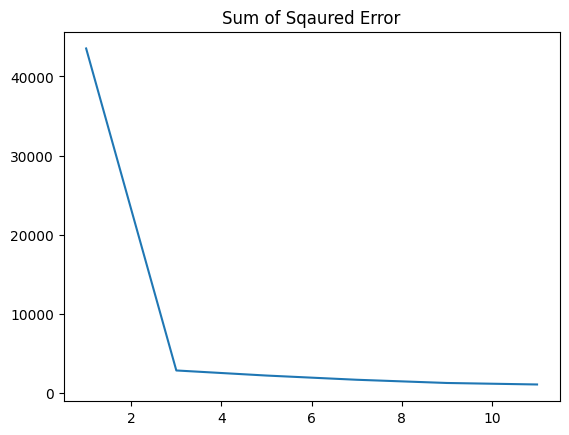

In [ ]:
## 적절한 K를 찾기
sse_per_n = []

for n in range(1, 12, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    sse = kmeans.inertia_
    sse_per_n += [sse]

plt.plot(range(1, 12, 2), sse_per_n)
plt.title("Sum of Sqaured Error")

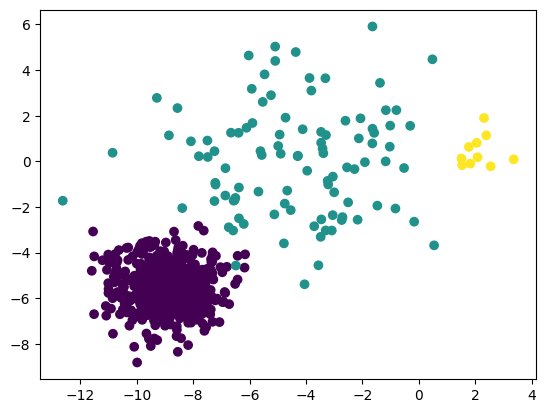

In [ ]:
# K-means의 한계
## 서로 다른 크기의 군집
size_data, size_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

size_data = np.vstack(
    (size_data[size_label == 0][:500],
     size_data[size_label == 1][:100],
     size_data[size_label == 2][:10])
)
size_label = [0] * 500 + [1] * 100 + [2] * 10

plt.scatter(size_data[:, 0], size_data[:, 1], c=size_label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


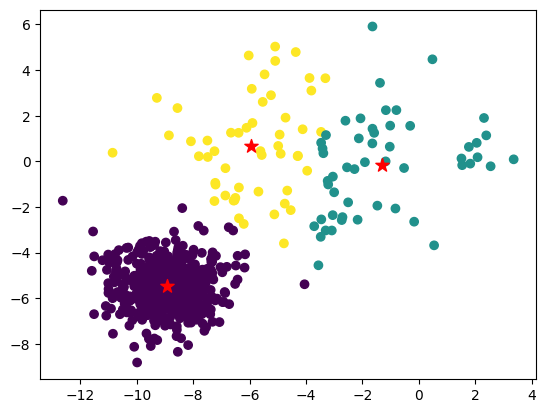

In [ ]:
size_kmeans = KMeans(n_clusters=3, random_state=2021)
size_pred = size_kmeans.fit_predict(size_data)
size_center = size_kmeans.cluster_centers_

plt.scatter(size_data[:, 0], size_data[:, 1], c=size_pred)
plt.scatter(size_center[:, 0], size_center[:, 1], marker="*", s=100, color="red")

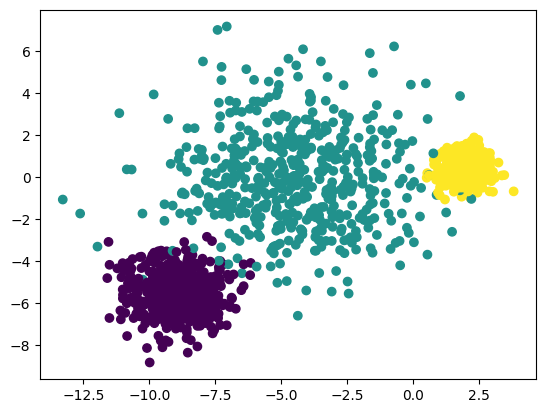

In [ ]:
# 서로 다른 밀도의 군집
density_data, density_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

plt.scatter(density_data[:, 0], density_data[:, 1], c=density_label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


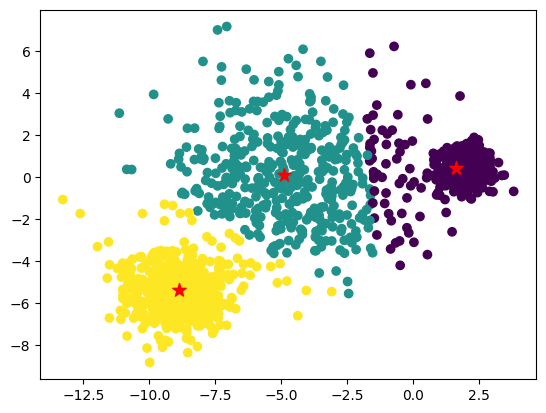

In [ ]:
density_kmeans = KMeans(n_clusters=3, random_state=2021)
density_pred = density_kmeans.fit_predict(density_data)
density_center = density_kmeans.cluster_centers_

plt.scatter(density_data[:, 0], density_data[:, 1], c=density_pred)
plt.scatter(density_center[:, 0], density_center[:, 1], marker="*", s=100, color="red")

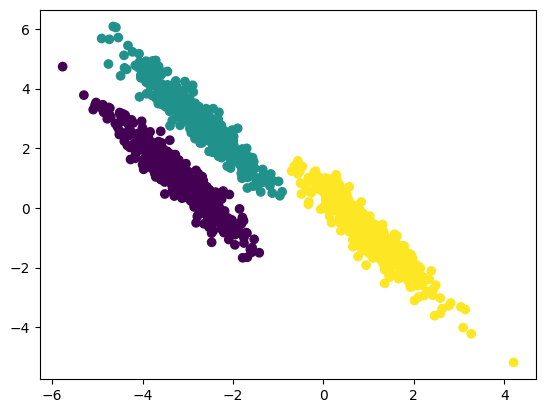

In [ ]:
# 지역적 패턴이 있는 군집
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
pattern_data = np.dot(data, transformation)

plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


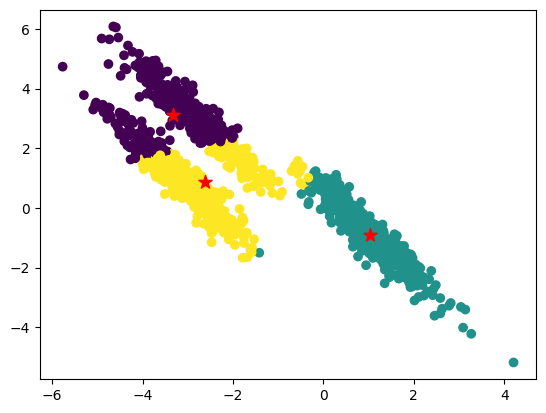

In [ ]:
pattern_kmeans = KMeans(n_clusters=3, random_state=2021)
pattern_pred = pattern_kmeans.fit_predict(pattern_data)
pattern_center = pattern_kmeans.cluster_centers_

plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_pred)
plt.scatter(pattern_center[:, 0], pattern_center[:, 1], marker="*", s=100, color="red")

## DB-Scan


In [ ]:
from sklearn.cluster import DBSCAN

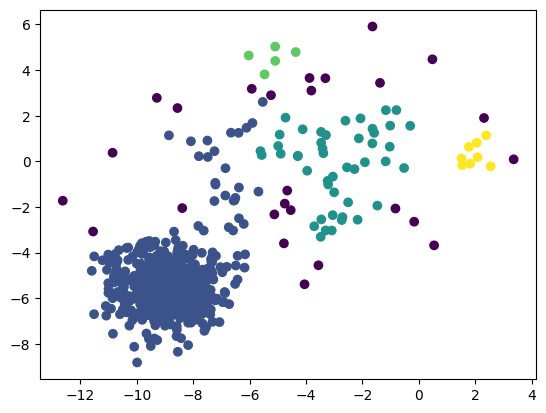

In [ ]:
# 서로 다른 크기의 군집
size_dbscan = DBSCAN(eps=1.0)
size_db_pred = size_dbscan.fit_predict(size_data)

plt.scatter(size_data[:, 0], size_data[:, 1], c=size_db_pred)

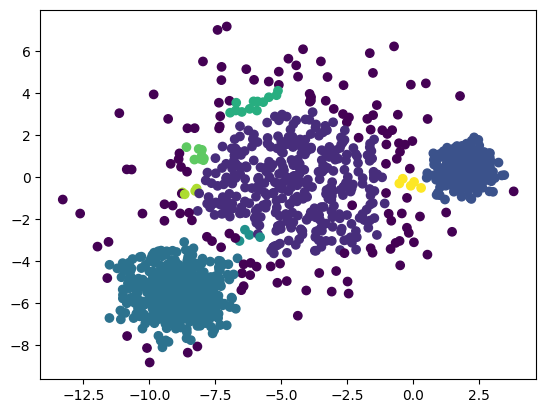

In [ ]:
# 서로 다른 밀도의 군집
density_dbscan = DBSCAN()
density_db_pred = density_dbscan.fit_predict(density_data)

plt.scatter(density_data[:, 0], density_data[:, 1], c=density_db_pred)

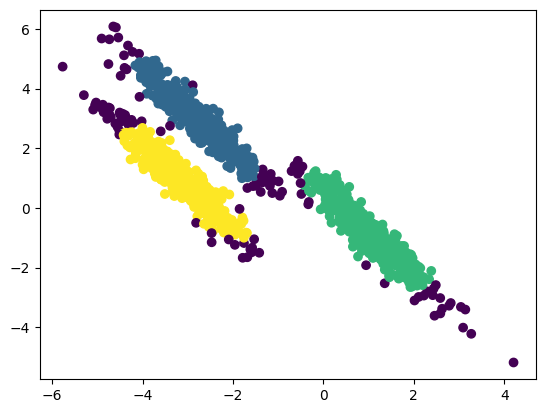

In [ ]:
# 지역적 패턴이 있는 군집
pattern_db = DBSCAN(eps=.3, min_samples=20)
pattern_db_pred = pattern_db.fit_predict(pattern_data)

plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_db_pred)

# Clustering으로 빈 데이터 채우기


## simple titanic survival data

In [ ]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [ ]:
# data setting
#colab에서 .csv 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab/study/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab/study/dataset


In [ ]:
import pandas as pd
titanic = pd.read_csv('simple_titanic.csv')

In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [ ]:
label = titanic["Survived"]
data = titanic.drop(["Survived"], axis=1)

In [ ]:
# data EDA
data.describe()

,Pclass,Age,Fare
count,1306.000000,1043.000000,1306.000000
mean,2.296325,29.813202,33.223956
std,0.837037,14.366254,51.765986
min,1.000000,0.170000,0.000000
25%,2.000000,21.000000,7.895800
50%,3.000000,28.000000,14.454200
75%,3.000000,39.000000,31.275000
max,3.000000,80.000000,512.329200


In [ ]:
data["Sex"].value_counts()

male      842
female    464
Name: Sex, dtype: int64

In [ ]:
# NAN 확인
# age 변수에 빈값 확인

data.isna().sum()

Pclass        0
Sex           0
Age         263
Fare          0
Embarked      0
dtype: int64

In [ ]:
# 정답 비율을 확인
label.value_counts()

0    814
1    492
Name: Survived, dtype: int64

In [ ]:
# Data preprocess
data.loc[:, "Sex"] = data["Sex"].map({"male": 0, "female": 1})
data.loc[:, "Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

<ipython-input-59-dbc82b77f3ec>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Sex"] = data["Sex"].map({"male": 0, "female": 1})
<ipython-input-59-dbc82b77f3ec>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [ ]:
# data split
from sklearn.model_selection import train_test_split

train_data, validation_data, train_label, validation_label = train_test_split(data, label, train_size=0.6, random_state=2021)

In [ ]:
valid_data, test_data, valid_label, test_label = train_test_split(validation_data, validation_label, train_size=0.5, random_state=2021)

In [ ]:
print(f"train_data size: {len(train_label)}, {len(train_label)/len(data):.2f}")
print(f"valid_data size: {len(valid_label)}, {len(valid_label)/len(data):.2f}")
print(f"test_data size: {len(test_label)}, {len(test_label)/len(data):.2f}")

train_data size: 783, 0.60
valid_data size: 261, 0.20
test_data size: 262, 0.20


In [ ]:
# index 리셋

train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
train_label = train_label.reset_index(drop=True)
valid_label = valid_label.reset_index(drop=True)
test_label = test_label.reset_index(drop=True)

In [ ]:
# 빈데이터를 채우는 방법
## 빈값을 확인 하기
na_cnt = data.isna().sum()
na_cnt.loc[na_cnt > 0].index

Index(['Age'], dtype='object')

In [ ]:
## 평균으로 빈값 채우기
mean_train_data = train_data.copy()
mean_valid_data = valid_data.copy()
mean_test_data = test_data.copy()

age_mean = mean_train_data["Age"].mean()
age_mean

30.13604100946372

In [ ]:
## fillna 함수로 nan값을 평균값으로 채우기

mean_train_data.loc[:, "Age"] = mean_train_data["Age"].fillna(age_mean)
mean_valid_data.loc[:, "Age"] = mean_valid_data["Age"].fillna(age_mean)
mean_test_data.loc[:, "Age"] = mean_test_data["Age"].fillna(age_mean)

mean_train_data.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# 비슷한 데이터들을 평균으로 채우는 방법
cluster_train_data = train_data.copy()
cluster_valid_data = valid_data.copy()
cluster_test_data = test_data.copy()

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cluster_train_data.drop(["Age"], axis=1))

StandardScaler()

In [ ]:
train_fill_data = scaler.transform(cluster_train_data.drop(["Age"], axis=1))
valid_fill_data = scaler.transform(cluster_valid_data.drop(["Age"], axis=1))
test_fill_data = scaler.transform(cluster_test_data.drop(["Age"], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

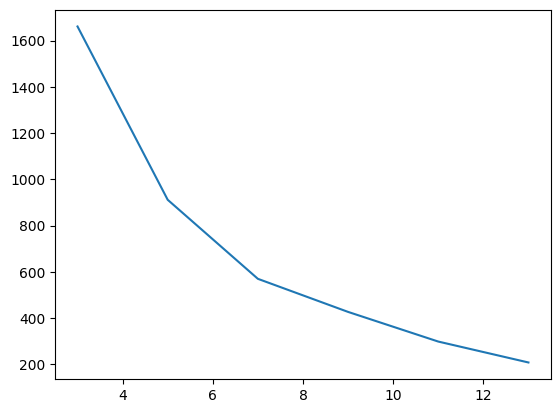

In [ ]:
# 최적의 K 찾기 -> SSE를 계산 후 그려보기

from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(3, 15, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(train_fill_data)
    n_cluster += [n]
    sse += [kmeans.inertia_]

plt.plot(n_cluster, sse)



In [ ]:
## SSE 그래프에서 꺽이는 지점인 7로 K를 정함
n_clusters = 7

In [ ]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train_fill_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
clustered_train = kmeans.predict(train_fill_data)
clustered_valid = kmeans.predict(valid_fill_data)
clustered_test = kmeans.predict(test_fill_data)

clustered_test

array([3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 2, 3, 3, 5, 0, 3, 6, 3, 3, 2, 3, 1,
       0, 0, 4, 3, 1, 3, 6, 3, 3, 1, 3, 3, 1, 3, 2, 5, 0, 3, 3, 0, 3, 0,
       3, 6, 5, 2, 3, 3, 2, 3, 0, 6, 3, 2, 1, 3, 3, 3, 5, 2, 0, 0, 3, 6,
       1, 1, 0, 3, 3, 1, 2, 5, 4, 3, 1, 2, 3, 2, 2, 1, 6, 3, 3, 0, 3, 5,
       3, 3, 1, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 2, 0, 2, 3,
       3, 1, 1, 2, 5, 1, 4, 5, 5, 2, 2, 0, 1, 5, 3, 2, 2, 3, 0, 2, 2, 2,
       3, 3, 6, 0, 0, 2, 3, 3, 4, 3, 3, 2, 3, 3, 6, 0, 5, 2, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 4, 0, 3, 3, 4, 6, 3, 3, 0, 0, 2, 1, 1, 3, 3, 2, 2,
       3, 5, 3, 4, 3, 2, 2, 3, 1, 1, 3, 6, 3, 6, 3, 6, 3, 2, 2, 6, 6, 3,
       3, 2, 3, 2, 2, 5, 5, 1, 3, 2, 5, 3, 5, 3, 5, 2, 0, 0, 6, 3, 2, 0,
       1, 0, 1, 2, 1, 3, 5, 2, 3, 2, 6, 3, 4, 1, 0, 0, 3, 2, 3, 0, 3, 2,
       0, 3, 1, 3, 3, 0, 3, 1, 3, 3, 6, 6, 3, 3, 3, 1, 2, 3, 0, 1],
      dtype=int32)

In [ ]:
cluster_fill_value = {}
for i in range(n_clusters):
    class_mean = cluster_train_data.loc[clustered_train == i, "Age"].dropna().mean()
    cluster_fill_value[i] = class_mean

# 빈 값을 채우기
cluster_fill_value

{0: 40.46551724137931,
 1: 29.25,
 2: 24.838064516129034,
 3: 27.871728395061727,
 4: 41.404761904761905,
 5: 37.17910447761194,
 6: 21.666666666666668}

In [ ]:
# train data에 빈값을 채우기

## 빈 값을 가지고 있는 데이터
train_na_idx = cluster_train_data.loc[cluster_train_data["Age"].isna()].index
train_na_idx

Int64Index([  2,   3,   9,  17,  26,  31,  41,  49,  53,  68,
            ...
            727, 732, 733, 742, 747, 754, 760, 764, 766, 777],
           dtype='int64', length=149)

In [ ]:
## 각 index가 속하는 군집
clustered_train[train_na_idx]

array([3, 0, 3, 0, 1, 6, 3, 2, 3, 1, 0, 0, 2, 0, 3, 6, 1, 1, 3, 3, 6, 6,
       3, 4, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 0, 1, 3, 5, 2, 0, 5, 0, 6, 0,
       0, 0, 3, 3, 1, 3, 6, 2, 3, 3, 3, 0, 3, 6, 5, 2, 3, 2, 6, 3, 3, 1,
       3, 2, 5, 1, 1, 1, 3, 5, 6, 3, 3, 6, 5, 1, 0, 5, 6, 6, 4, 2, 1, 1,
       6, 3, 6, 1, 2, 5, 1, 6, 1, 0, 3, 3, 1, 1, 3, 3, 6, 1, 6, 6, 5, 1,
       6, 0, 6, 1, 1, 6, 1, 3, 3, 0, 3, 1, 1, 1, 3, 3, 1, 3, 0, 3, 3, 2,
       1, 2, 3, 1, 3, 2, 1, 0, 3, 1, 3, 5, 2, 0, 0, 1, 1], dtype=int32)

In [ ]:
# index에 채울 값들을 가져옴
train_fill_value = list(map(lambda x: cluster_fill_value[x], clustered_train[train_na_idx]))
train_fill_value[:10]

[27.871728395061727,
 40.46551724137931,
 27.871728395061727,
 40.46551724137931,
 29.25,
 21.666666666666668,
 27.871728395061727,
 24.838064516129034,
 27.871728395061727,
 29.25]

In [ ]:
# train data NAN 값 채워주기
cluster_train_data.loc[train_na_idx, "Age"] = train_fill_value

cluster_train_data.loc[train_na_idx]

cluster_train_data.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,21.000000,7.2250,1
1,3,0,34.500000,6.4375,1
2,3,0,27.871728,69.5500,0
3,1,0,40.465517,30.5000,0
4,3,0,20.000000,4.0125,1


In [ ]:
# valid data, test data 채워주기
valid_na_idx = cluster_valid_data.loc[cluster_valid_data["Age"].isna()].index
valid_fill_value = list(map(lambda x: cluster_fill_value[x], clustered_valid[valid_na_idx]))

test_na_idx = cluster_test_data.loc[cluster_test_data["Age"].isna()].index
test_fill_value = list(map(lambda x: cluster_fill_value[x], clustered_test[test_na_idx]))

cluster_valid_data.loc[valid_na_idx, "Age"] = valid_fill_value
cluster_test_data.loc[test_na_idx, "Age"] = test_fill_value

In [ ]:
# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
## Hyper-Parameter Tuning
### 전체 데이터의 평균으로 채운 데이터
n_estimators = [n for n in range(50, 1050, 50)]

mean_accuracy = []
for n_estimator in n_estimators:
    mean_random_forest = RandomForestClassifier(n_estimators=n_estimator)
    mean_random_forest.fit(mean_train_data, train_label)
    mean_valid_pred = mean_random_forest.predict(mean_valid_data)
    mean_accuracy += [accuracy_score(valid_label, mean_valid_pred)]

list(zip(n_estimators, mean_accuracy))

[(50, 0.8544061302681992),
 (100, 0.8505747126436781),
 (150, 0.8544061302681992),
 (200, 0.8620689655172413),
 (250, 0.8544061302681992),
 (300, 0.8582375478927203),
 (350, 0.8582375478927203),
 (400, 0.8620689655172413),
 (450, 0.8582375478927203),
 (500, 0.8544061302681992),
 (550, 0.8582375478927203),
 (600, 0.8582375478927203),
 (650, 0.8582375478927203),
 (700, 0.8582375478927203),
 (750, 0.8582375478927203),
 (800, 0.8582375478927203),
 (850, 0.8544061302681992),
 (900, 0.8582375478927203),
 (950, 0.8582375478927203),
 (1000, 0.8582375478927203)]

In [ ]:
mean_best_n_estimator = n_estimators[np.argmax(mean_accuracy)]

print(f"Best n_estimator for mean data is {mean_best_n_estimator}, it's valid accuracy is {max(mean_accuracy):.4f}")

Best n_estimator for mean data is 200, it's valid accuracy is 0.8621


In [ ]:
### 비슷한 데이터들의 평균으로 채운 데이터
cluster_accuracy = []
for n_estimator in n_estimators:
    cluster_random_forest = RandomForestClassifier(n_estimators=n_estimator)
    cluster_random_forest.fit(cluster_train_data, train_label)
    cluster_valid_pred = cluster_random_forest.predict(cluster_valid_data)
    cluster_accuracy += [accuracy_score(valid_label, cluster_valid_pred)]

list(zip(n_estimators, cluster_accuracy))

[(50, 0.8582375478927203),
 (100, 0.8620689655172413),
 (150, 0.8582375478927203),
 (200, 0.8582375478927203),
 (250, 0.8620689655172413),
 (300, 0.8544061302681992),
 (350, 0.8582375478927203),
 (400, 0.8620689655172413),
 (450, 0.8544061302681992),
 (500, 0.8544061302681992),
 (550, 0.8582375478927203),
 (600, 0.8582375478927203),
 (650, 0.8544061302681992),
 (700, 0.8620689655172413),
 (750, 0.8582375478927203),
 (800, 0.8582375478927203),
 (850, 0.8582375478927203),
 (900, 0.8544061302681992),
 (950, 0.8620689655172413),
 (1000, 0.8544061302681992)]

In [ ]:
cluster_best_n_estimator = n_estimators[np.argmax(cluster_accuracy)]

print(f"Best n_estimator for cluster data is {cluster_best_n_estimator}, it's valid accuracy is {max(cluster_accuracy):.4f}")

Best n_estimator for cluster data is 100, it's valid accuracy is 0.8621


In [ ]:
### Best Parameter
mean_random_forest = RandomForestClassifier(n_estimators=mean_best_n_estimator)
cluster_random_forest = RandomForestClassifier(n_estimators=cluster_best_n_estimator)

In [ ]:
#학습
mean_random_forest.fit(mean_train_data, train_label)
cluster_random_forest.fit(cluster_train_data, train_label)

RandomForestClassifier()

In [ ]:
# 예측
mean_test_pred = mean_random_forest.predict(mean_test_data)
cluster_test_pred = cluster_random_forest.predict(cluster_test_data)

In [ ]:
# 평가
mean_test_accuracy = accuracy_score(test_label, mean_test_pred)
cluster_test_accuracy = accuracy_score(test_label, cluster_test_pred)

print(f"Test Accuracy for mean data is {mean_test_accuracy:.4f}")
print(f"Test Accuracy for cluster data is {cluster_test_accuracy:.4f}")

Test Accuracy for mean data is 0.8550
Test Accuracy for cluster data is 0.8550


# 이미지 압축: K Means를 이용한 이미지 압축


In [ ]:
# setting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [ ]:
# data loading
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")

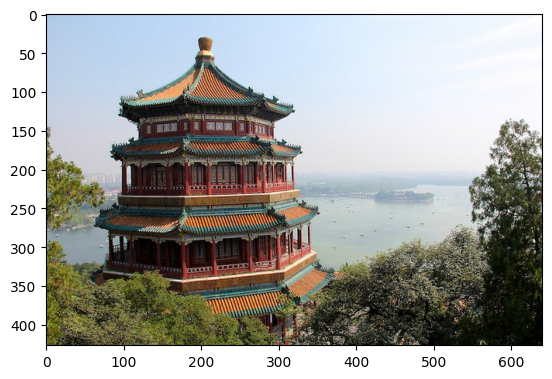

In [ ]:
plt.imshow(china)

In [ ]:
# Data Scaling
china_flatten = china / 255.0
china_flatten = china_flatten.reshape(-1, 3)
china_flatten.shape

(273280, 3)

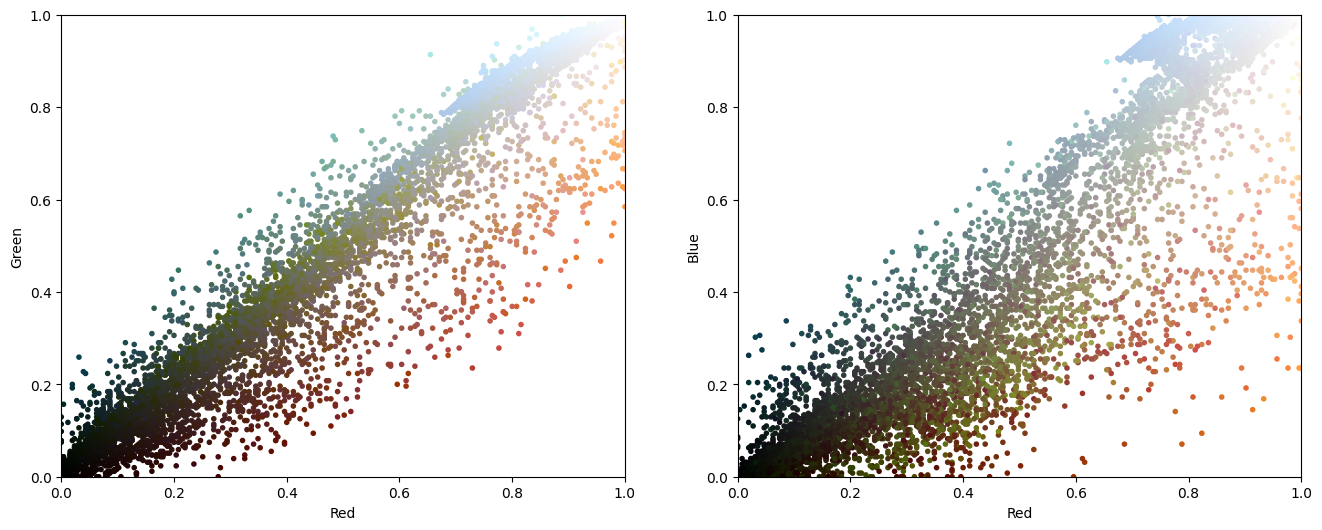

In [ ]:
# data EDA
def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

plot_pixels(china_flatten)

In [ ]:
# K-means 학습
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)
kmeans.fit(china_flatten)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

In [ ]:
# K-means 새로운 색상
kmeans.cluster_centers_

array([[0.94677021, 0.96189003, 0.98658565],
       [0.3631889 , 0.2548443 , 0.12790399],
       [0.68877077, 0.39217748, 0.28437508],
       [0.1524257 , 0.12474224, 0.09002017],
       [0.80340988, 0.82384934, 0.84296969],
       [0.21487451, 0.21965224, 0.17696364],
       [0.43139253, 0.44987676, 0.40556148],
       [0.70933515, 0.74802872, 0.73834568],
       [0.58550523, 0.62922899, 0.613776  ],
       [0.45558189, 0.42639859, 0.22336961],
       [0.75129593, 0.83979159, 0.93988925],
       [0.56862982, 0.54430122, 0.42392742],
       [0.86325963, 0.62369904, 0.45818299],
       [0.32663123, 0.32674945, 0.27605775],
       [0.05309609, 0.05005092, 0.0275222 ],
       [0.86697269, 0.91298842, 0.96437902]])

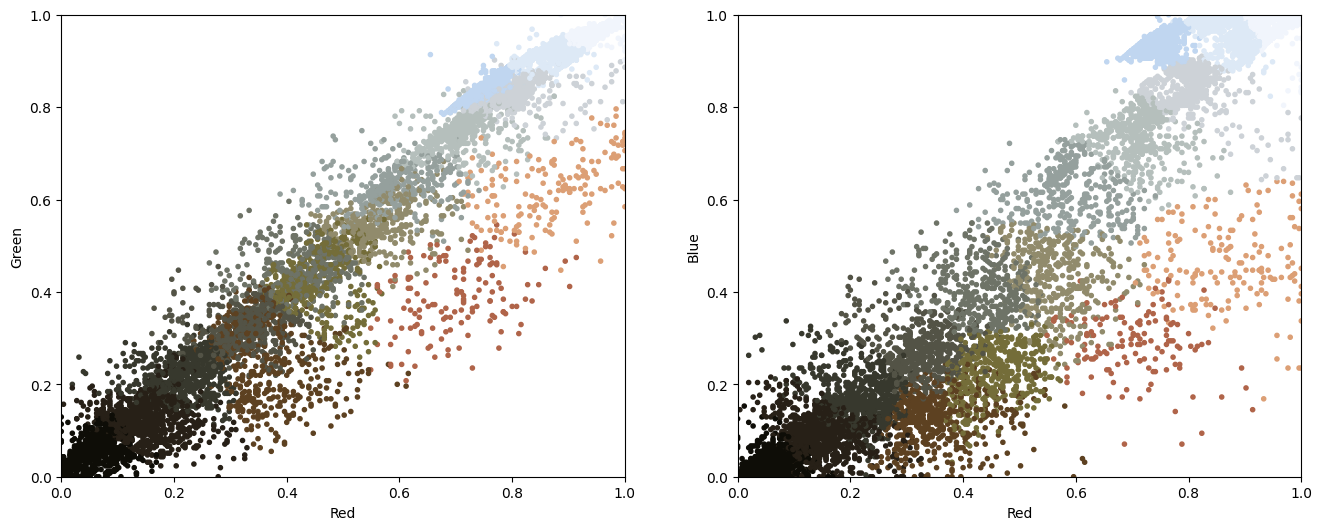

In [ ]:
# K-means 변환
new_color_label = kmeans.predict(china_flatten)
new_colors = kmeans.cluster_centers_[new_color_label]

plot_pixels(china_flatten, colors=new_colors)

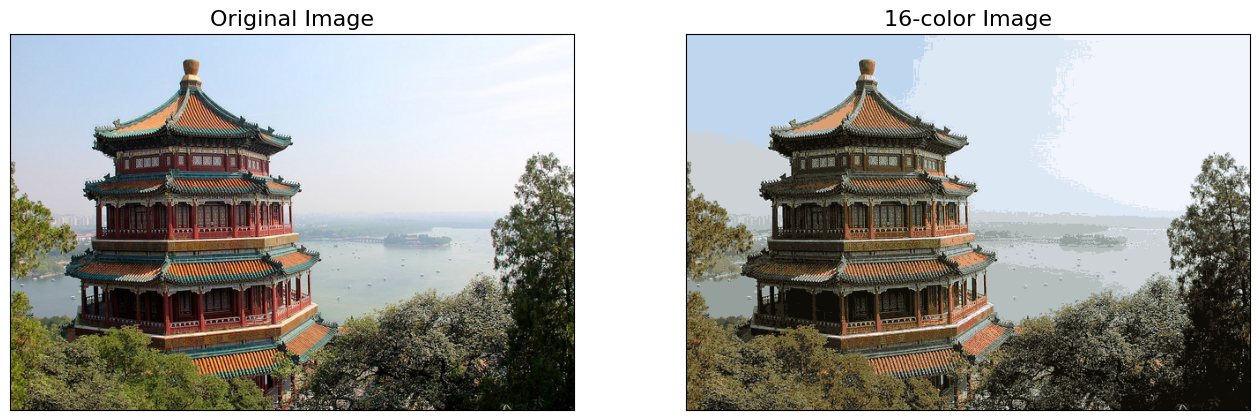

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16);